In [6]:
%matplotlib inline

# Name:    plot_geojson
# Purpose: plots a GeoJSON file
# Notes:   takes a GeoJSON file and plots the centroids as well as the 
# Author:  bmitto

#----------------------------------------------------------------------
#------------------------- IMPORT LIBRARIES ---------------------------
import json # reading geojson files
import matplotlib.pyplot as plt # plotting data
from shapely.geometry import asShape # manipulating geometry
from descartes import PolygonPatch # integrating geom object to matplot

<bound method _AxesBase.clear of <matplotlib.axes._subplots.AxesSubplot object at 0x7f6d9c8877f0>>

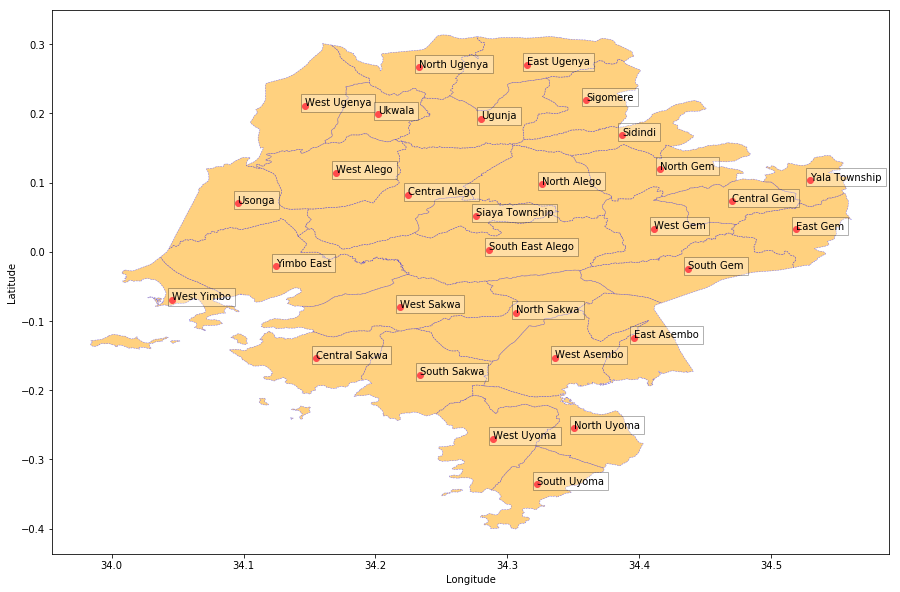

In [14]:
#------------------------- LOAD THE DATA -----------------------------
data = json.load(open("wards.geojson")) # from data folder.

# initiate the plot axes
fig = plt.figure(figsize=(15, 10)) # create a figure to contain the plot elements
ax = fig.gca(xlabel="Longitude", ylabel="Latitude") 

# loop through the features plotting polygon centroid
for feat in data["features"]:
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    # obtain the coordinates of the feature's centroid
    x, y = geom.centroid.x, geom.centroid.y
    # plot the centroids
    ax.plot(x, y, 'ro')
    # label the features at the centroid location
    ax.text(x, y, feat["properties"]["ward"], fontsize=10, bbox = dict(fc='w',
            alpha=0.3))
    # plot the polygon features: type help(PolygonPatch) for more args
    ax.add_patch(PolygonPatch(feat["geometry"], fc='orange', ec='blue',
                alpha=0.5, lw=0.5, ls='--', zorder=2))
ax.clear